# Data Set Information:

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

# Attribute Information:

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

## Import requrired libraries....

In [1]:
#import required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Algerian Forestdata

In [2]:
df = pd.read_csv(r'E:\\himanshu_2022\\Download\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


# DATA Cleaning

In [6]:
# drop rows which have no information..
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [7]:
# creating region feature..
df.loc[:122,'region'] = '0'
df.loc[122:, 'region'] = '1'

In [8]:
#datatype & describe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [11]:
#stripping the names of the column...
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [12]:
df['Classes'].dtype

dtype('O')

In [13]:
# Changing The DataTypes of the Columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

In [14]:
#datatype & describe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


# EDA for Algerian Forest dataset

In [15]:
## Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'.

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [16]:
## Showing Updated Dataset after Modification Done.
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,2012-09-29


# EXPLORING DATA

In [17]:
# getting shape and size
df.shape

(244, 13)

In [18]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

# finding missing values

In [19]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

In [20]:
# here we have no null value.

In [21]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [22]:
#here if you we observe there are only 'fire' and 'not fire' values are present here we need to convert other thing to above
#two values.

In [23]:
## Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,NaN,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,NaN,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,NaN,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,NaN,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,NaN,0,2012-06-05


In [24]:
df['Classes'].value_counts()

1.0    4
0.0    2
Name: Classes, dtype: int64

# Replacing Null Value

In [25]:
# The best Way of Replacing Null Value by using mode

df['Classes'].mode() [0]    

1.0

In [26]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [27]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [28]:
# Now We have Zero Null Value in dataset

In [29]:
df['Classes'].unique()

array([1., 0.])

In [30]:
# Check Null & getting feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [31]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,1.0,1,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0,1,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0,1,2012-09-29


In [32]:
## Checking the usage of the memory by the dataset

df.memory_usage()


Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

In [33]:
# Numerical and Continuous features

In [34]:
# categorical features

In [35]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O' ]


# print columns
print('\n We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))


 We have 3 categorical features : ['DC', 'FWI', 'region']


In [36]:
# Numerical features

In [37]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


In [38]:
df[numerical_features].nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
ISI            106
BUI            174
Classes          2
date           122
dtype: int64

# Univariate Analysis

In [39]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.008163
dtype: float64

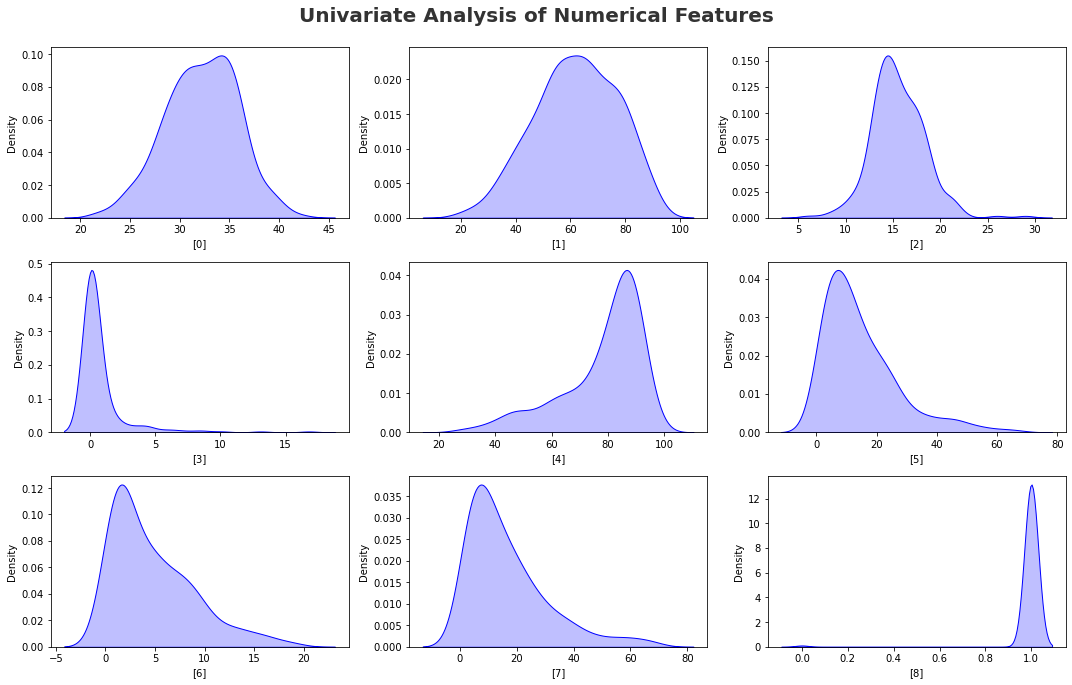

In [42]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)-1):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel([i])
    plt.tight_layout()

In [43]:
#Observations

#Rain,ISI,BUI,DMC are right skewed and postively skewed.
#FFMC is a Left skewed and Negetively skewed.
#Outliers in Rain, ISI, BUI, DMC and FFMC

# Scatter plot 

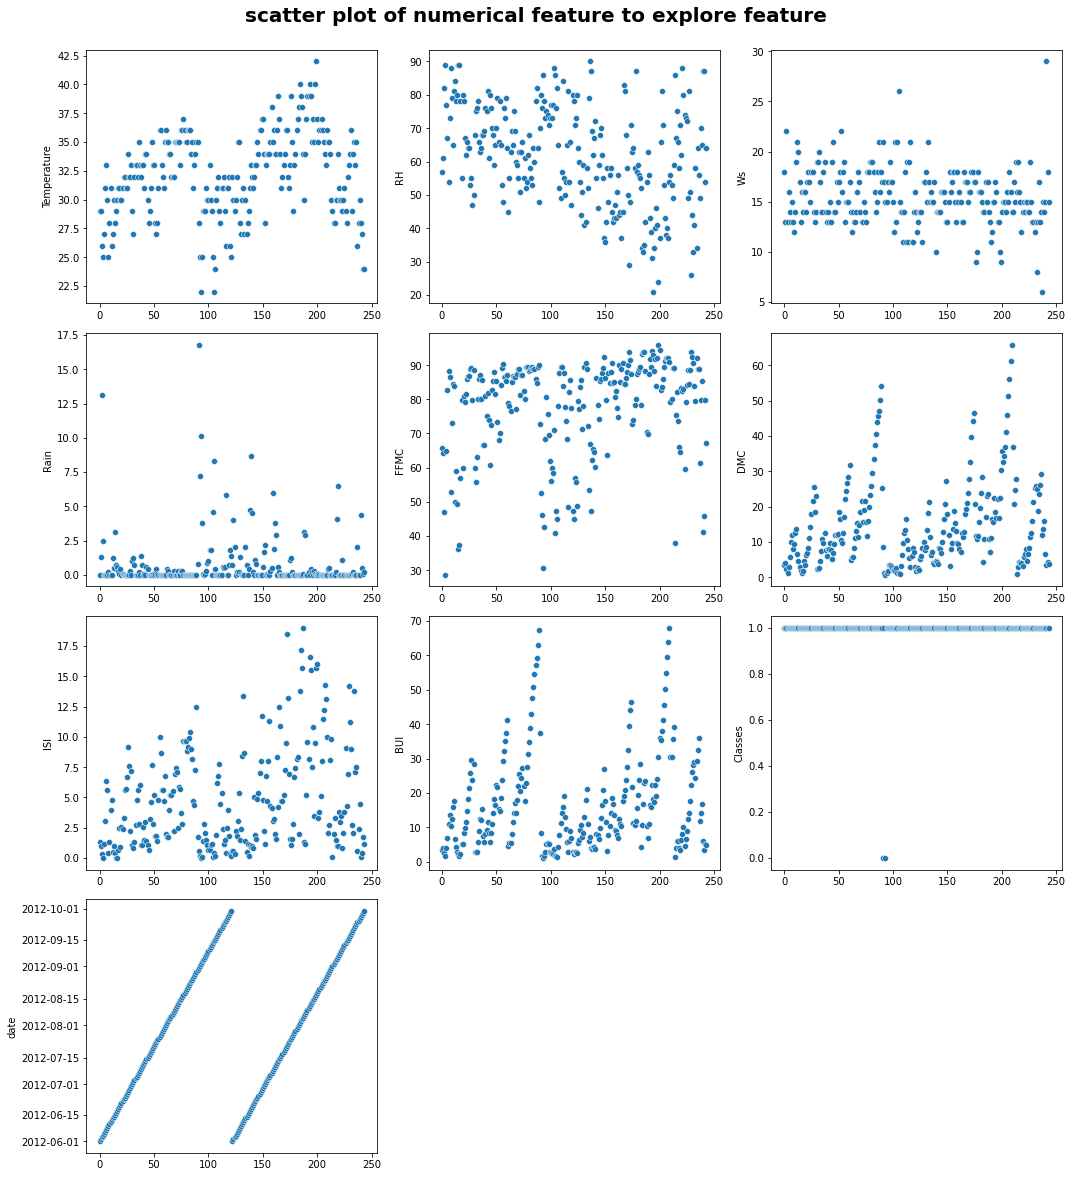

In [44]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot of numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

In [45]:
# Discrete numercal features

In [46]:
# here is the assumption to consider if discrete values is less tha 35 that will be consider continuous features...
descrete_features = [feature for feature in numerical_features if len(df[feature].unique())<35]
descrete_features


['Temperature', 'Ws', 'Classes']

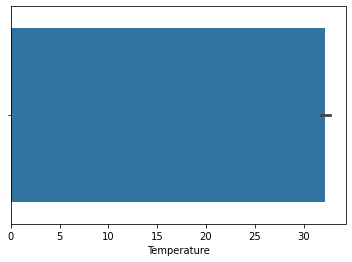

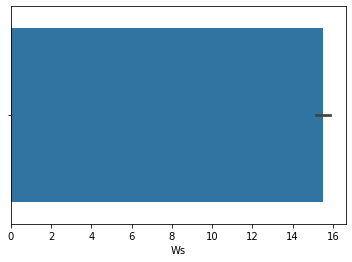

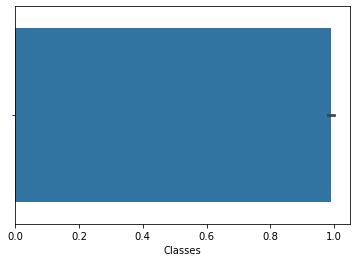

In [47]:
for features in descrete_features:
    sns.barplot(data = df, x=features , hue='Temperature')
    plt.show()

In [48]:
continuous_features=[feature for feature in numerical_features if feature not in descrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'date']


# Multicolleniarity in numerical features

In [49]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.179796
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.128903
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.080908
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.578146
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.231195
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.073458
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.097616
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.076730
Classes,0.179796,-0.128903,-0.080908,-0.578146,0.231195,0.073458,0.097616,0.076730,1.000000


In [50]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.991803
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.090349
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,1.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


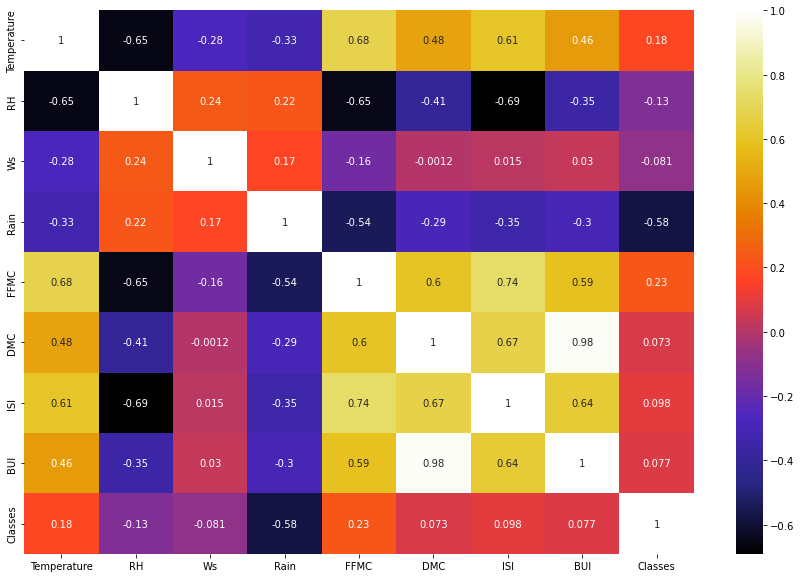

In [51]:
## Plotting Heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [52]:
#observation -

#Highly +ve correlated features are DMC and BUI
#Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI

# Boxplot to find Outliers in the features

<AxesSubplot:>

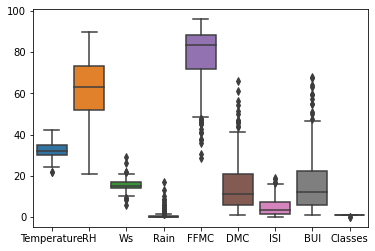

In [53]:
# Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")

# Statistical Analysis

In [54]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.991803
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.090349
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,1.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


# Graphical Analysis

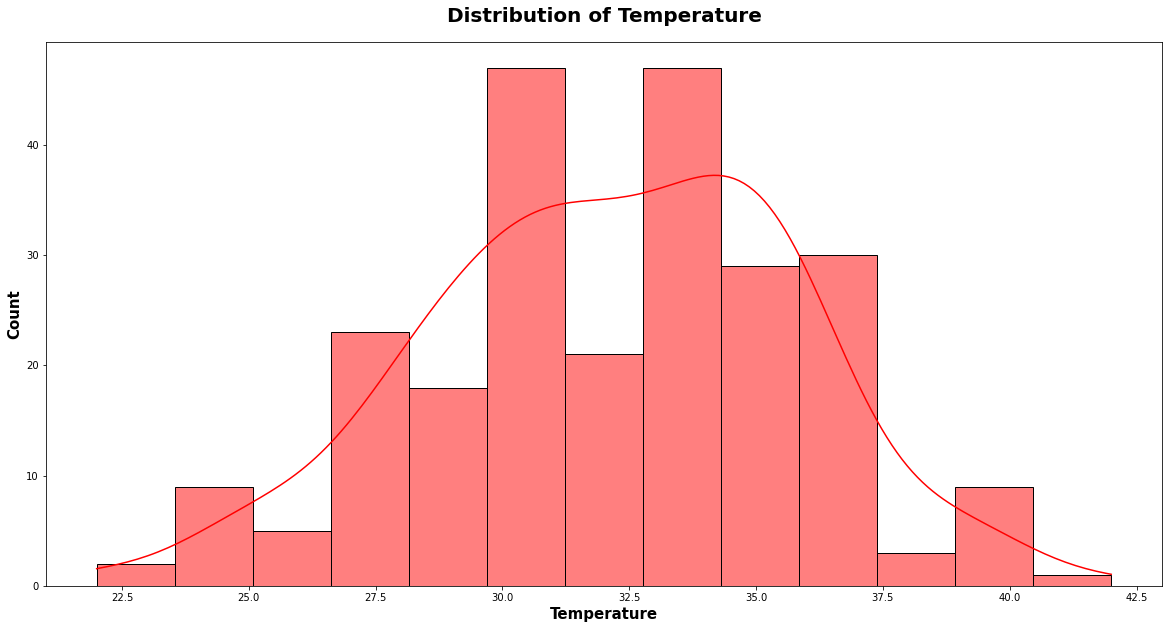

In [55]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='r',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

In [56]:
#Observation:-

#Temperature occur most of the time in range 32.5 to 35.0

# Highest Temperature attained

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

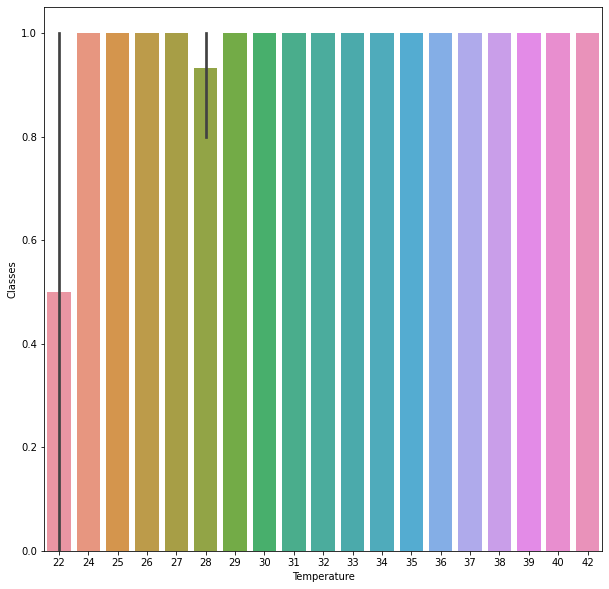

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,10)

sns.barplot( x="Temperature", y="Classes",data=df)

<AxesSubplot:>

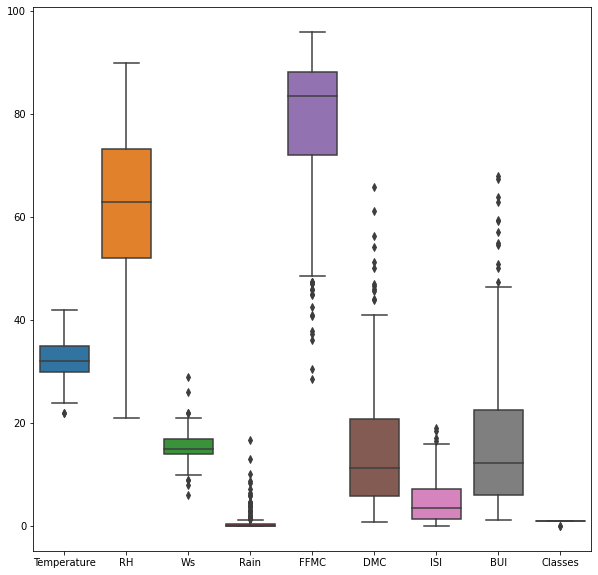

In [58]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")

In [59]:
#Observation:-

#Ws, Rain, FFMC, DMC BUI has many outliers

# Boxplot of Class Vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

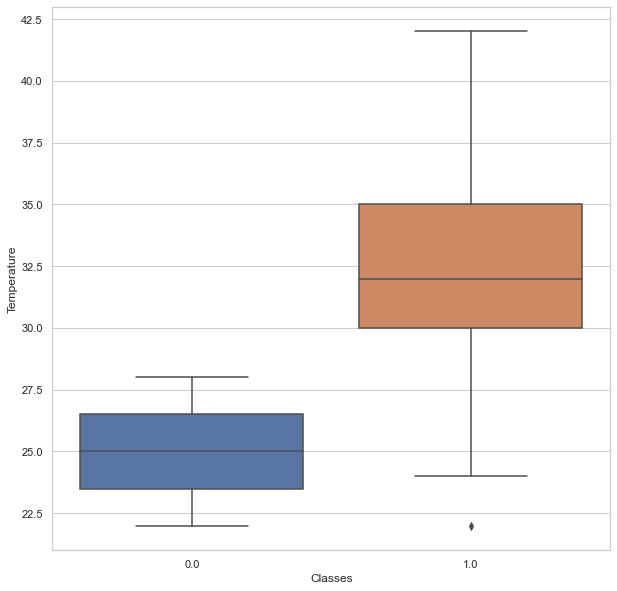

In [60]:
# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Temperature', data = df)

In [61]:
# Here, Classes contain 0 = Fire, 1 = Not Fire.

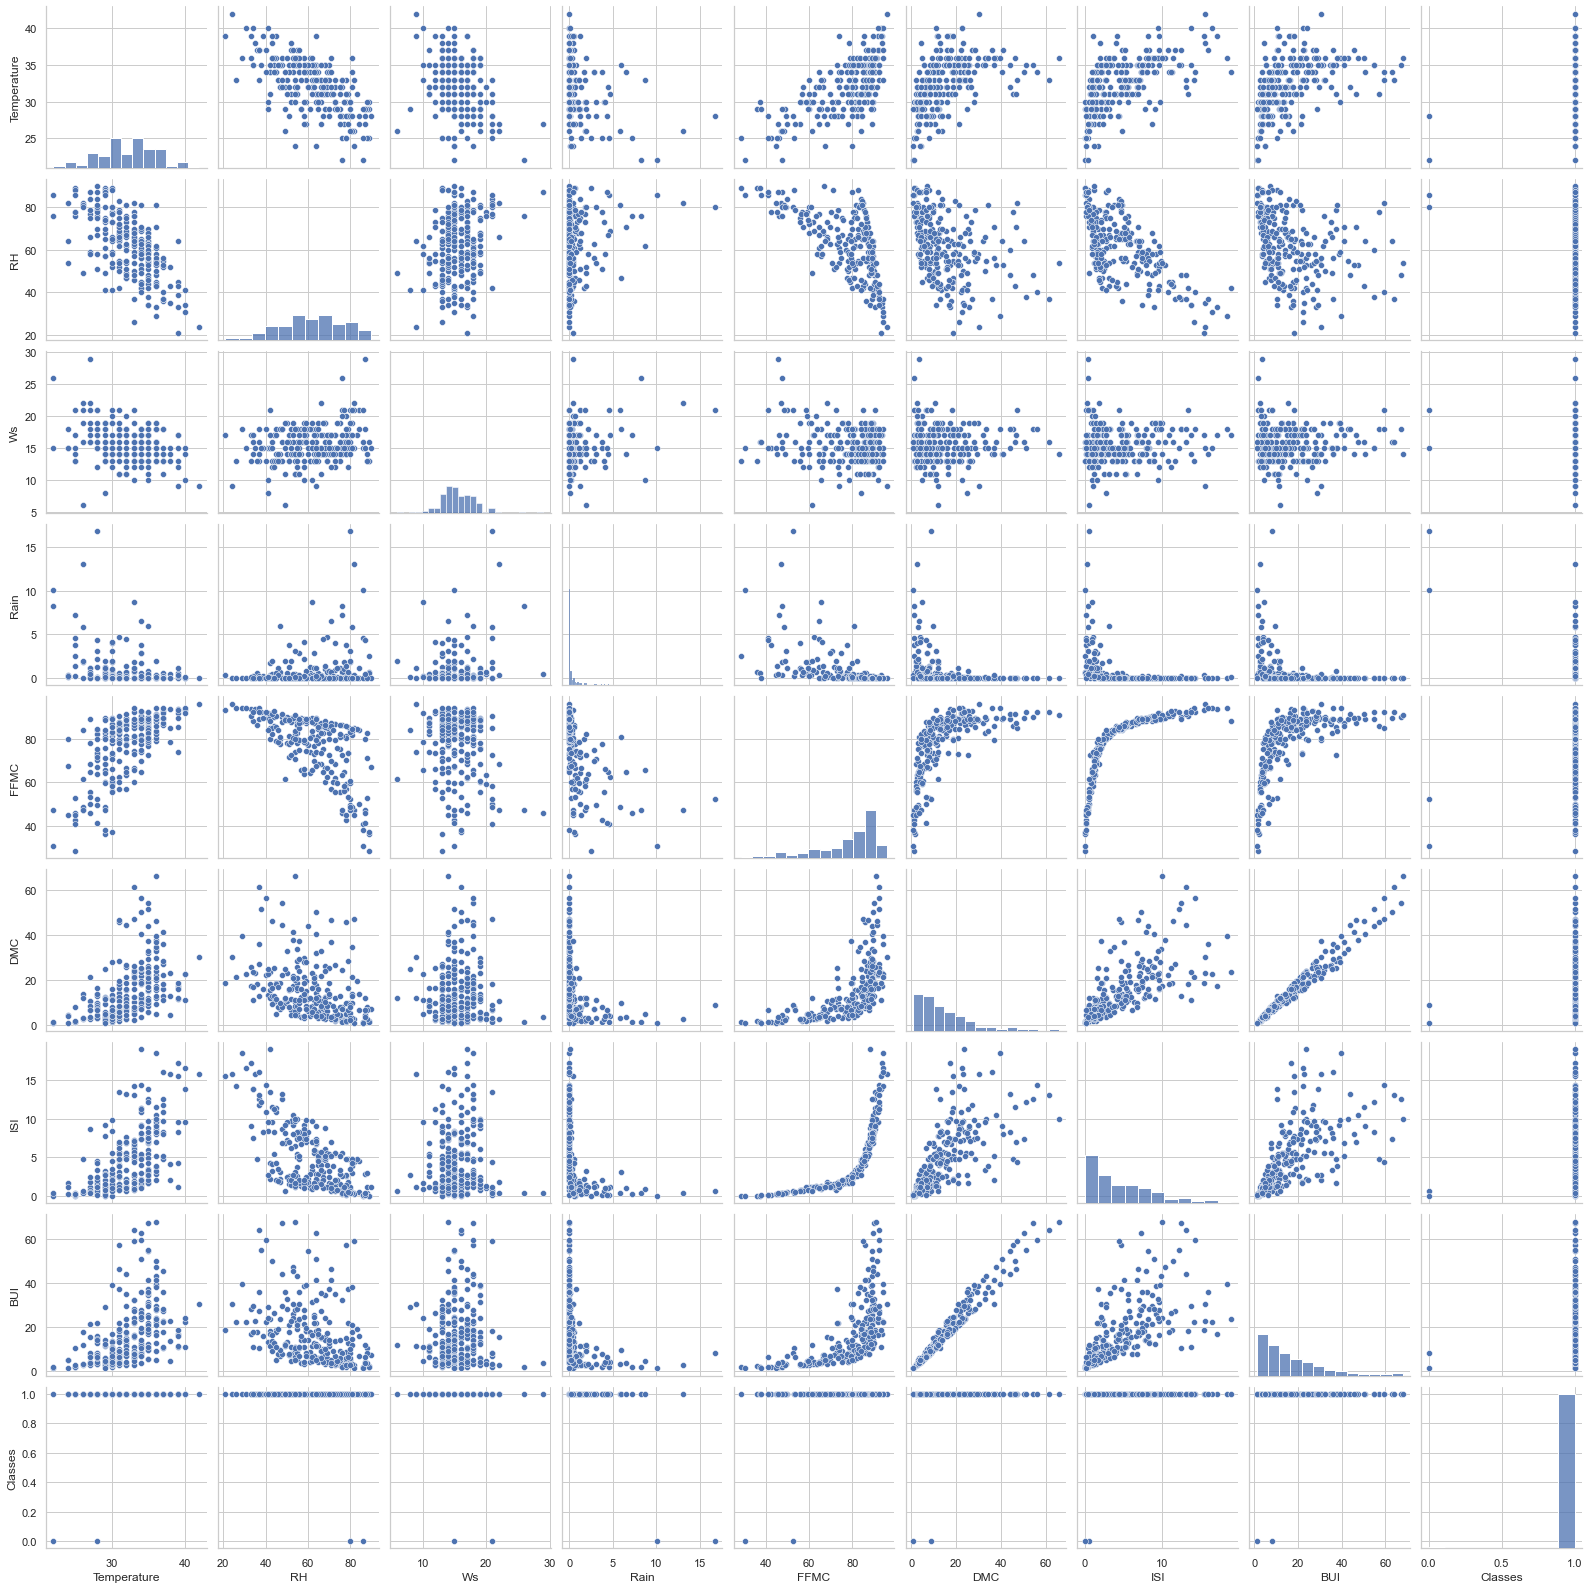

In [62]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

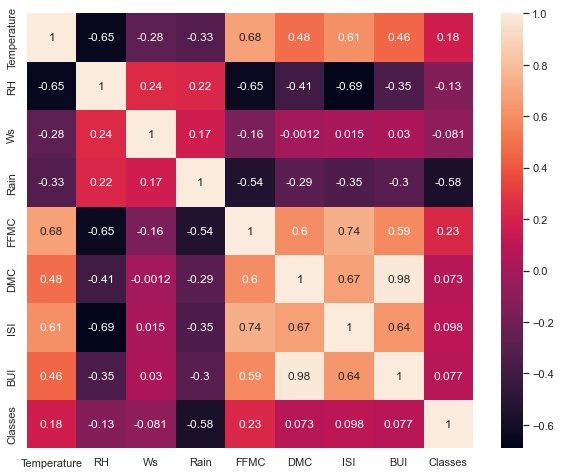

In [63]:
sns.set(rc = {'figure.figsize' : (10,8)})
sns.heatmap(df.corr(), annot = True)

<Figure size 1080x1080 with 0 Axes>

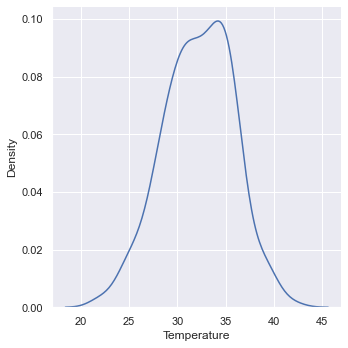

In [64]:
plt.figure(figsize=(15, 15))
sns.displot(df['Temperature'],kind='kde')
plt.show()

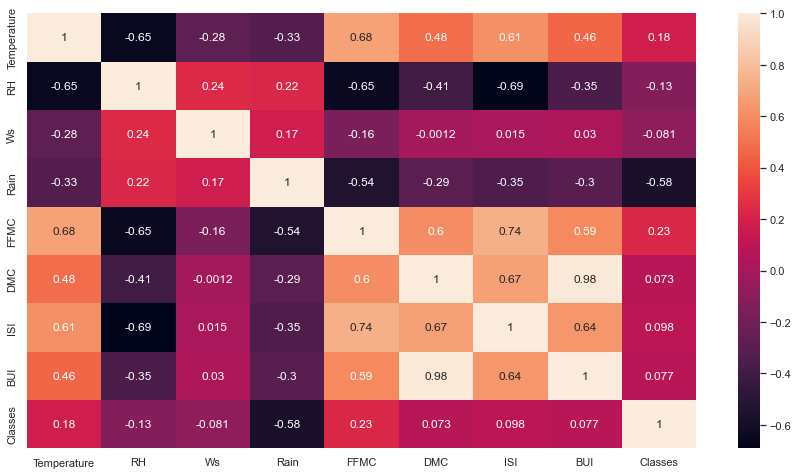

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [66]:
#We can obaserve month, RH,Ws,Rain,Region and Classes are -vely correlated with temparature
#We can observer that day, FFMC,DMC,DC,ISI,BUI and FWI are +vely correlated with tempareture
#If we observe heatmap carefully BUI has correlation with DC and DMC almost 1 so any of feature is sufficient for the recongization of temprature

Text(0, 0.5, 'Temperature')

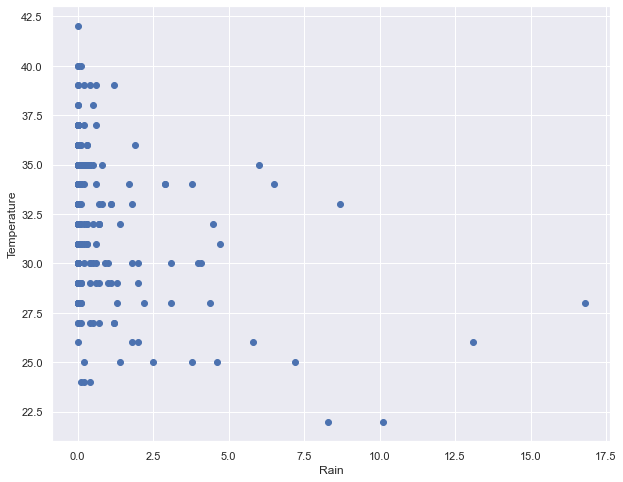

In [67]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

In [68]:
#Observation:-

#Where Rain is Higher , the Temperature is low.
#Where Rain is Low, the Temperature is high.

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

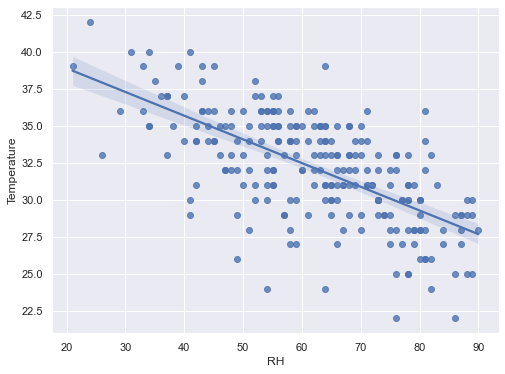

In [69]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x = "RH", y = "Temperature", data = df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

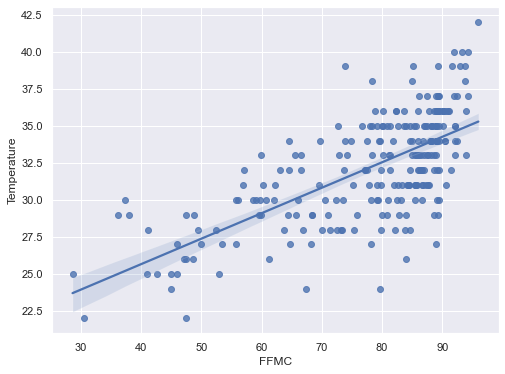

In [70]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FFMC",y="Temperature",data=df)

In [71]:
#from scatter plot we observe that less rain fall more likely high temprature.

Text(0, 0.5, 'Temperature')

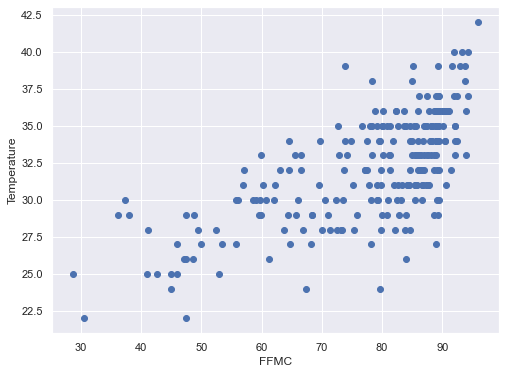

In [72]:
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

In [73]:
#FFMC has the linear relationship with the temprature

Text(0, 0.5, 'Temperature')

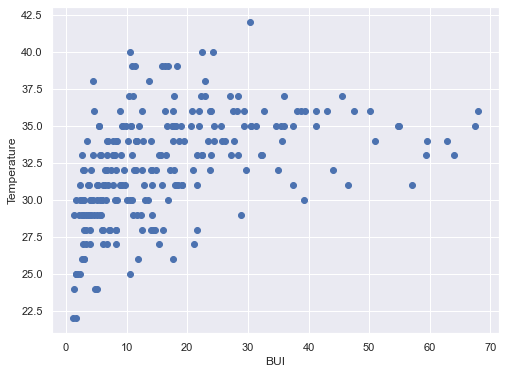

In [74]:
plt.scatter(df['BUI'],df['Temperature'])
plt.xlabel('BUI')
plt.ylabel('Temperature')

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

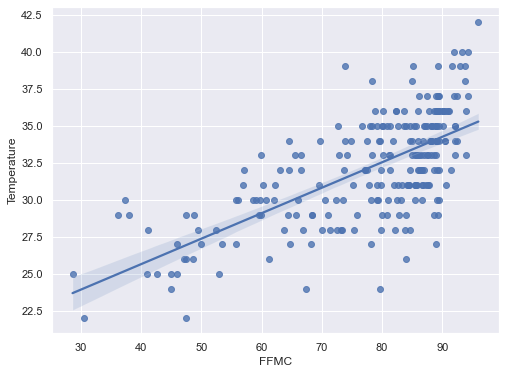

In [75]:
sns.regplot(x='FFMC',y='Temperature',data=df)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

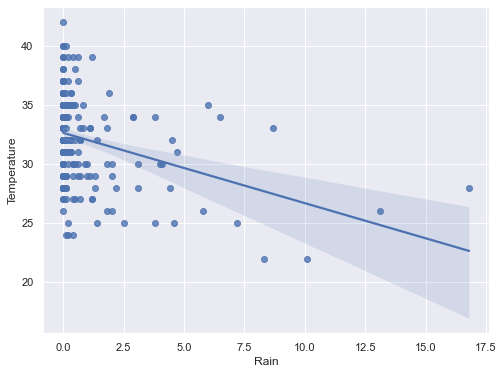

In [76]:
sns.regplot(x='Rain',y='Temperature',data=df)

<AxesSubplot:xlabel='Rain'>

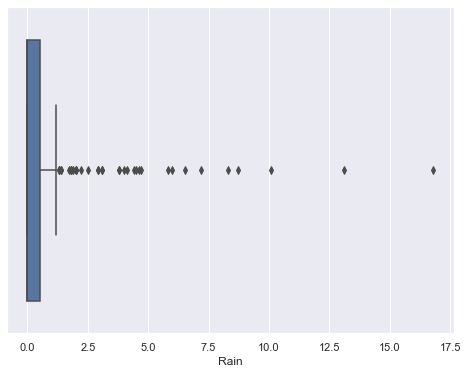

In [77]:
sns.boxplot(df['Rain'])

<AxesSubplot:xlabel='FFMC'>

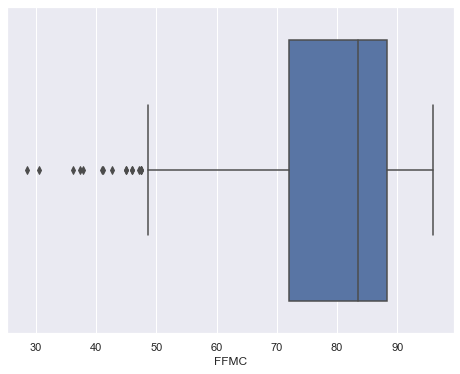

In [78]:
sns.boxplot(df['FFMC'])

<AxesSubplot:xlabel='BUI'>

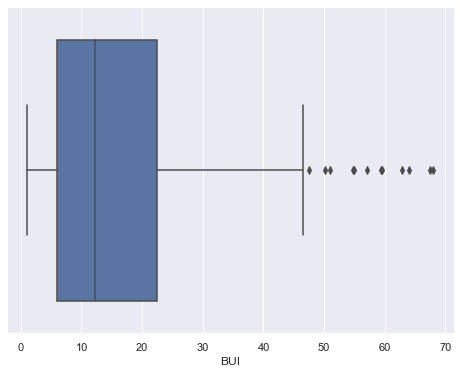

In [79]:
sns.boxplot(df['BUI'])

In [80]:
y = df['Temperature']
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

# create a model

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [82]:
df['DC'].dtype 

dtype('O')

In [83]:
df['FWI'].dtype

dtype('O')

In [84]:
 ## In DC & FWI Feature there are many Object Dtype Available, after Observing ,I  Drop 'DC' & 'FWI' Feature from dataset.
df = df.drop(columns = ('DC'),  axis = 1)
df = df.drop(columns = ('FWI'),  axis = 1)

In [85]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,1.0,0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,1.0,0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,1.0,0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,1.0,0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,1.0,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,1,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,1.0,1,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,1.0,1,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,1.0,1,2012-09-29


In [86]:
import numpy as np
df.info()  ## Now After Data Cleaning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   ISI          244 non-null    float64       
 7   BUI          244 non-null    float64       
 8   Classes      244 non-null    float64       
 9   region       244 non-null    object        
 10  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 19.2+ KB


In [87]:
## Independent and Dependent Feature

x = df.iloc[:, 1:-2]         ## x = All Other Numeric Features Except "Temperature" Feature
y = df.iloc[:,0]             ## y = Targeted feature "Temperature"

In [88]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,1.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,1.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,1.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,1.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,1.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,1.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,1.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,1.0


In [89]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [94]:
# train test split
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state =42)

In [101]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
114,54,11.0,0.5,73.7,7.9,1.2,9.6,1.0
65,65,13.0,0.0,86.8,11.1,5.2,11.5,1.0
132,42,21.0,0.0,90.6,18.2,13.4,18.0,1.0
207,40,18.0,0.0,92.1,56.3,14.3,59.5,1.0
162,56,15.0,2.9,74.8,7.1,1.6,6.8,1.0
...,...,...,...,...,...,...,...,...
106,82,15.0,0.4,44.9,0.9,0.2,1.4,1.0
14,80,17.0,3.1,49.4,3.0,0.4,3.0,1.0
92,76,17.0,7.2,46.0,1.3,0.2,1.8,1.0
179,57,16.0,0.0,87.5,15.7,6.7,15.7,1.0


In [103]:
Y_train

114    32
65     34
132    31
207    34
162    34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 163, dtype: int32

In [104]:
X_train.shape

(163, 8)

In [106]:
Y_train.shape

(163,)

In [107]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
24,64,15.0,0.0,86.7,14.2,5.7,18.3,1.0
6,54,13.0,0.0,88.2,9.9,6.4,10.9,1.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,1.0
211,53,17.0,0.5,80.2,20.7,2.7,30.6,1.0
198,41,10.0,0.1,92.0,22.6,9.5,24.2,1.0
...,...,...,...,...,...,...,...,...
180,59,16.0,0.0,88.1,19.5,7.4,19.5,1.0
5,67,14.0,0.0,82.6,5.8,3.1,7.0,1.0
56,48,13.0,0.0,90.3,22.2,8.7,29.4,1.0
125,64,14.0,0.0,79.4,5.2,2.2,5.6,1.0


In [108]:
X_test.shape

(81, 8)

In [110]:
Y_test

24     31
6      33
153    33
211    35
198    40
       ..
180    34
5      31
56     36
125    30
148    36
Name: Temperature, Length: 81, dtype: int32

# Standardize or Feature Scalling the Dataset

In [111]:
# standarding the featues using Standard Scaler feature
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
X_train = scaler.fit_transform(X_train) 

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.transform(X_test)

In [116]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.80014076,
        -0.47763563,  0.11145564],
       [ 0.14460201, -0.93856657, -0.39436188, ...,  0.16132584,
        -0.3471914 ,  0.11145564],
       [-1.41768313,  2.04653297, -0.39436188, ...,  2.13233237,
         0.09906517,  0.11145564],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.04050741,
        -1.01314351,  0.11145564],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.52187581,
        -0.058841  ,  0.11145564],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.82417743,
        -0.9719506 ,  0.11145564]])

In [117]:
X_test

array([[ 6.40000000e+01,  1.50000000e+01,  6.98146381e-17,
         8.67000000e+01,  1.42000000e+01,  5.70000000e+00,
         1.83000000e+01,  1.00000000e+00],
       [ 5.40000000e+01,  1.30000000e+01,  6.98146381e-17,
         8.82000000e+01,  9.90000000e+00,  6.40000000e+00,
         1.09000000e+01,  1.00000000e+00],
       [ 4.80000000e+01,  1.60000000e+01,  6.98146381e-17,
         8.76000000e+01,  7.90000000e+00,  6.80000000e+00,
         7.80000000e+00,  1.00000000e+00],
       [ 5.30000000e+01,  1.70000000e+01,  5.00000000e-01,
         8.02000000e+01,  2.07000000e+01,  2.70000000e+00,
         3.06000000e+01,  1.00000000e+00],
       [ 4.10000000e+01,  1.00000000e+01,  1.00000000e-01,
         9.20000000e+01,  2.26000000e+01,  9.50000000e+00,
         2.42000000e+01,  1.00000000e+00],
       [ 6.40000000e+01,  9.00000000e+00,  1.20000000e+00,
         7.38000000e+01,  1.17000000e+01,  1.10000000e+00,
         1.14000000e+01,  1.00000000e+00],
       [ 3.90000000e+01,  1.500000

In [118]:
X_train.shape

(163, 8)

In [119]:
X_test.shape

(81, 8)

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
regression = LinearRegression()
regression

LinearRegression()

In [123]:
regression.fit(X_train,Y_train)

LinearRegression()

# Print the Coefficients and the intercept

In [124]:
print(regression.coef_)

[-1.08068527 -0.47399798  0.23449726  1.69533972  0.19226509  0.06879782
  0.16792122  0.21627747]


In [125]:
print(regression.intercept_)

31.98159509202454


In [136]:
# prediction for testdata
reg_pred = regression.predict(X_test)
reg_pred

array([109.10526957, 121.38192941, 124.54927645, 112.25111259,
       148.20696459,  88.40498263, 140.63699972,  23.0193359 ,
        69.26639093,  50.51734543,  65.98125845, 106.01967076,
       110.01144402, 101.55344325, 129.64237163,  99.73025288,
       159.47853515,  -8.08290087,  96.22953365, 115.57923834,
        77.67049201,  41.20621508, 129.8432205 ,  52.53397103,
       155.63440306,  20.0222529 , 103.9052249 , 112.65550817,
       114.94006487, 135.97621592, 123.16500207,  78.34629643,
       109.16790176, 116.329109  , 102.58447844, 108.95345216,
        73.52839016, 125.31430373,  75.22547474,   3.63703358,
       113.31270531, 113.94024195, 105.56508457,  -7.71004865,
       147.38537956, 102.94024901,  87.91983704,  68.11195989,
       144.31988756, 127.83752743, 164.3729315 ,  82.24869256,
        84.97661581, 124.06685123, 125.12892315, 103.51154524,
       167.03778128, 102.25102429,  70.7471432 , 154.30951144,
       115.70893573,  71.01436752, 123.94780724,  93.88

# Assumption of Linear Regression

Text(0, 0.5, 'Test Predict Data')

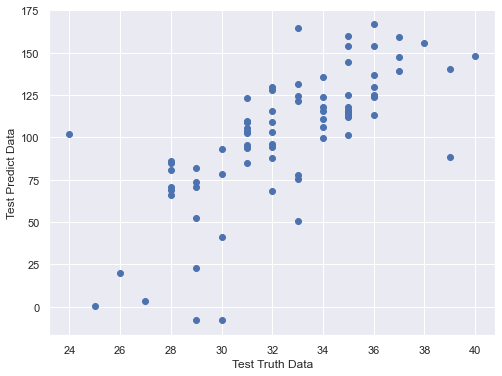

In [137]:
# relation between real and pred data 
plt.scatter(Y_test,reg_pred) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [138]:
# The relation b/w test predicted data and test truth data are in the linear

In [139]:
## calculate residual
residual = Y_test-reg_pred
residual

24     -78.105270
6      -88.381929
153    -91.549276
211    -77.251113
198   -108.206965
          ...    
180    -83.745640
5      -64.694908
56    -101.055893
125    -63.099510
148    -88.766466
Name: Temperature, Length: 81, dtype: float64

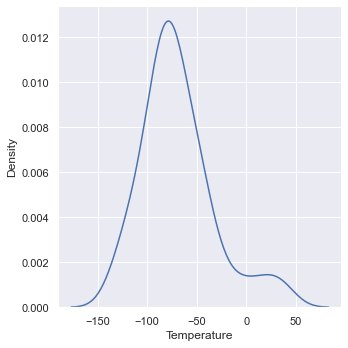

In [140]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little sked due to outliers

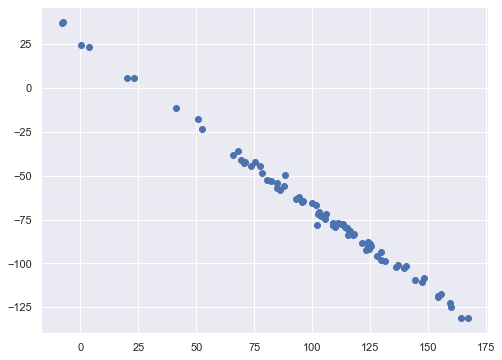

In [141]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(reg_pred,residual)

In [142]:
# Data b/w the reg_prd and residual are in random in nature

# performance Matrics

In [143]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

6123.419107404463
72.68738093887517
78.25227860838598


# R Squared and Adjusted R-Squared


In [144]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

-569.1114341376568


In [145]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-632.4571490418409

# Ridge Regression Model Prediction

In [146]:
## Ridge Regression 
from sklearn.linear_model import Ridge

In [147]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [148]:
ridge_reg

Ridge(alpha=0.1)

In [150]:
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.1)

# Print the coefficients and the intercept

In [151]:
print(ridge_reg.coef_)

[-1.08040352 -0.47394056  0.23287938  1.69216565  0.19233994  0.07059053
  0.16817904  0.21579917]


In [152]:
print(ridge_reg.intercept_)

31.98159509202454


In [154]:
rid_pred =ridge_reg.predict(X_test)
rid_pred

array([108.86449231, 121.13248384, 124.29998521, 112.0254531 ,
       147.95139787,  88.19265231, 140.38455956,  22.88576135,
        69.06280825,  50.34720067,  65.77688035, 105.7950737 ,
       109.77306757, 101.32746293, 129.40698123,  99.49135897,
       159.23059727,  -8.17257896,  95.99070718, 115.33315439,
        77.44537763,  41.04192183, 129.58925518,  52.36490487,
       155.38269097,  19.89339859, 103.6678355 , 112.41578751,
       114.69640484, 135.72867537, 122.9178343 ,  78.14950701,
       108.92989237, 116.09606062, 102.35283027, 108.72540866,
        73.31457406, 125.0731808 ,  75.02415423,   3.51808965,
       113.07991393, 113.69836232, 105.34029333,  -7.80340117,
       147.13200075, 102.7010279 ,  87.69002405,  67.92224268,
       144.06853589, 127.58878153, 164.13572134,  82.02038841,
        84.74711817, 123.83532328, 124.88671069, 103.2883027 ,
       166.79477561, 102.01834333,  70.56153401, 154.05668117,
       115.46550941,  70.82013043, 123.70446887,  93.64

# Assumptions of Ridge Regression:-

Text(0, 0.5, 'Test Predict Data')

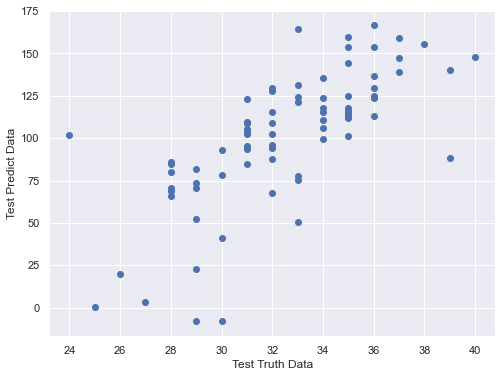

In [156]:
# relation between real and pred data 
plt.scatter(Y_test,rid_pred) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [157]:
## calculate residual
residual = Y_test-rid_pred
residual

24     -77.864492
6      -88.132484
153    -91.299985
211    -77.025453
198   -107.951398
          ...    
180    -83.502822
5      -64.459729
56    -100.807905
125    -62.871623
148    -88.520805
Name: Temperature, Length: 81, dtype: float64

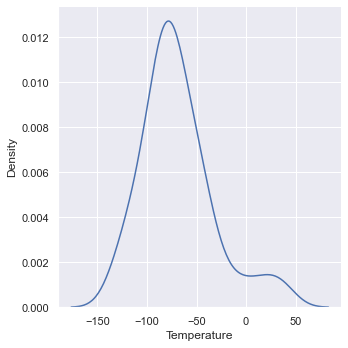

In [158]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little left-sked due to outliers

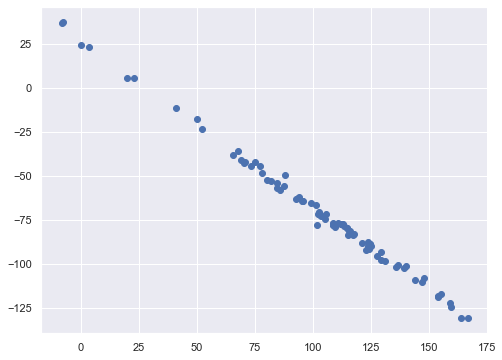

In [159]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(rid_pred,residual)

# Performance Metric

In [161]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,rid_pred))
print(mean_absolute_error(Y_test,rid_pred))
print(np.sqrt(mean_squared_error(Y_test,rid_pred)))

6090.101748997214
72.48124604479126
78.03910397356708


# R Squared and Adjusted R Squared

In [163]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,rid_pred)
print(score)

-566.009473182499


In [164]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-629.0105257583323

# Lasso regerssion

In [165]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [166]:
lasso = Lasso()

In [167]:
lasso

Lasso()

In [168]:
lasso.fit(X_train,Y_train)

Lasso()

# Print the coefficients and the intercept

In [169]:
## print the coefficients
print(lasso.coef_)

[-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.        ]


In [170]:
## print the Intercept
print(lasso.intercept_)

31.98159509202454


In [171]:
## Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [172]:
lasso_pred

array([100.97321025, 109.08936308, 112.07533214,  99.66608537,
       121.96361967,  84.77319558, 119.81940496,  43.28034851,
        74.67106125,  61.70817865,  75.78730125,  95.67079971,
       101.30330951,  94.1638216 , 109.59635364,  96.35468158,
       127.34496645,  21.8478912 ,  93.74079252, 105.95448988,
        83.95942839,  57.21989601, 113.71255628,  64.82439375,
       127.96354494,  41.64778889,  97.58717404, 101.9731978 ,
       104.15903254, 117.58692495, 107.96379402,  78.8428775 ,
       101.09879176, 101.6011178 ,  98.04285481, 100.01484274,
        81.05239558, 108.67530234,  75.59641637,  35.40136512,
       101.18239253, 103.43819517,  98.52185821,  23.35486931,
       122.46128118,  97.60583214,  87.74086724,  73.23835486,
       121.67980496, 111.58699968, 124.70775476,  86.70822801,
        86.3687997 , 103.73600345, 110.96842119,  91.11757441,
       131.82858456,  98.41493481,  75.82892128, 125.19142269,
       106.34522798,  77.24296957, 108.7219476 ,  92.84

# Assumptions of Lasso Regression:-

Text(0, 0.5, 'Test Predicted Data')

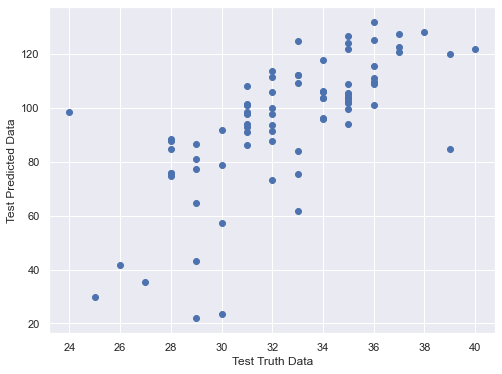

In [173]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,lasso_pred)        ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [174]:
## Calculating residuals
residuals=Y_test- lasso_pred

In [175]:
residuals

24    -69.973210
6     -76.089363
153   -79.075332
211   -64.666085
198   -81.963620
         ...    
180   -71.847566
5     -62.954639
56    -79.466033
125   -61.805760
148   -73.596354
Name: Temperature, Length: 81, dtype: float64

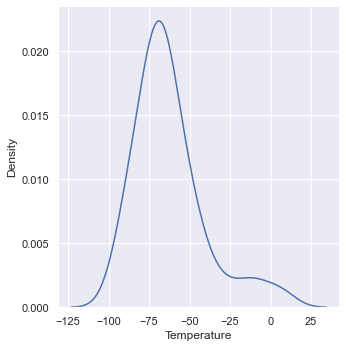

In [176]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

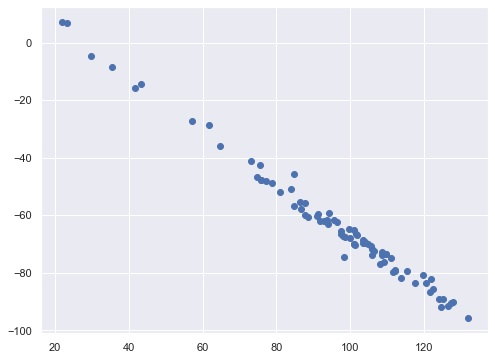

In [177]:
## SCatter plot with predictions and residual
##uniform distribution

plt.scatter(lasso_pred,residuals)

# Performance Metrics

In [178]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

4387.876775110824
62.918246407584135
66.2410505284361


# R Squared and Adjusted R Squared

In [179]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

-407.5264583723871


In [180]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-452.91828708043005

# Elastic Net Regression

In [181]:
## Elastic Net Regression
from sklearn.linear_model import ElasticNet

In [182]:
elastic = ElasticNet()

In [183]:
elastic

ElasticNet()

In [184]:
elastic.fit(X_train, Y_train)
ElasticNet()

ElasticNet()

# Print the coefficients and the intercept

In [185]:
# print the coefficients
print(elastic.coef_)

[-0.70096473 -0.10037923 -0.01339157  0.88617204  0.14470627  0.3017531
  0.06907718  0.        ]


In [186]:
# print the Intercepts
print(elastic.intercept_)

31.98159509202454


In [187]:
# Prediction for the Test data
elastic_pred = elastic.predict(X_test)

In [189]:
elastic_pred

array([ 67.48421387,  75.10169678,  78.0917937 ,  70.11223426,
        91.57342139,  54.41233753,  88.12292104,  18.21738285,
        42.90598493,  33.38030859,  42.73391343,  65.49388161,
        67.74233428,  62.49119934,  81.39187988,  61.87777887,
       100.70948985,   0.67021085,  59.00038889,  71.68751597,
        48.45640166,  28.40195292,  80.00454684,  36.37111948,
        98.71271385,  16.99620432,  64.00237599,  69.62734176,
        71.7546596 ,  86.23748633,  75.4736706 ,  49.79213549,
        68.32234377,  72.20163834,  64.39794409,  68.34019749,
        46.91495735,  77.59224251,  46.68691758,   9.61730214,
        70.03376585,  69.98997377,  67.11149254,   1.3055487 ,
        92.10359089,  63.7535592 ,  54.3824145 ,  43.86833161,
        90.70657438,  79.15789437, 103.38929427,  51.09507699,
        52.52843595,  76.58764792,  79.11275786,  63.49423361,
       107.0996958 ,  64.43675679,  46.9916305 ,  96.22785298,
        72.85797244,  46.67835935,  77.46461846,  57.69

# Assumptions of ElasticNet Regression

Text(0, 0.5, 'Test Predicted Data')

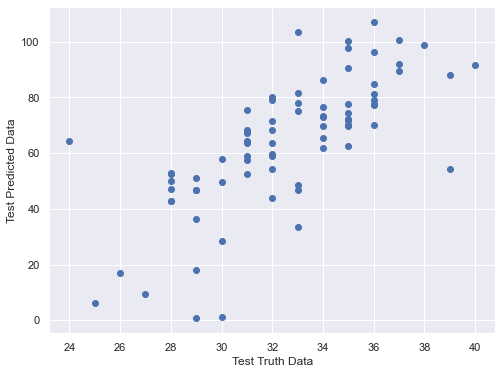

In [190]:
## Relation Between Real Data and Predicted Data
plt.scatter(Y_test,elastic_pred)     ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [191]:
## Calculating residuals
residuals=Y_test- elastic_pred

In [192]:
residuals

24    -36.484214
6     -42.101697
153   -45.091794
211   -35.112234
198   -51.573421
         ...    
180   -39.492115
5     -28.067731
56    -48.920294
125   -27.879765
148   -41.755966
Name: Temperature, Length: 81, dtype: float64

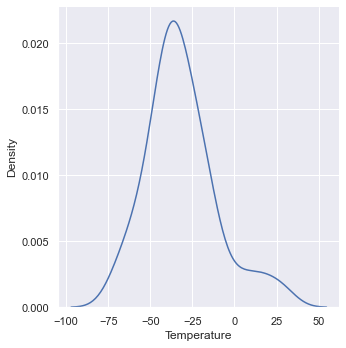

In [193]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

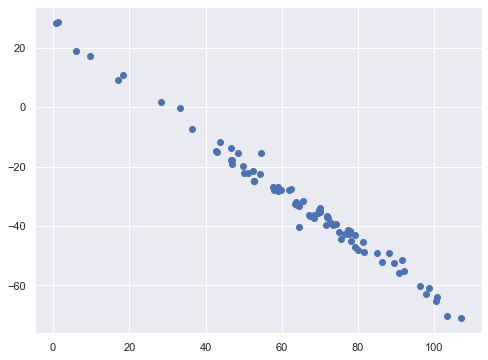

In [194]:
# SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elastic_pred,residuals)

# Performance Metrics

In [195]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

1431.3869284564835
34.4777664282066
37.8336745301918


# R Squared and Adjusted R Squared

In [196]:
# R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
print(score)

-132.26705885629326


In [197]:
# Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-147.07450984032585